# Яндекс Афиша: анализ данных

- Автор: Зотова Дарья
- Дата: 13.10.2025

### Цель и задачи проекта

**Цель:** Провести анализ данных Яндекс Афиши за лето–осень 2024 года, чтобы выявить инсайты об изменении пользовательских предпочтений, оценить влияние сезонности на продажи и активность пользователей, а также проверить гипотезы о различиях в поведении пользователей мобильных и стационарных устройств.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
   - изучить распределение заказов по категориям (тип мероприятия, тип устройства, возрастной рейтинг);
   - проанализировать осеннююю активность пользователей по дням и изучить недельную цикличность;
   - определить топ-категории по числу мероприятий, заказов и выручке в разрезе регионов и билетных партнёров.
4. Проверить гипотезы:
   - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями ПК.
   - Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями ПК.
6. Сформулировать выводы по проведённому анализу и дать рекомендации сервису.

### Описание данных

Данные состоят из трёх датасетов:

- `final_tickets_orders_df.csv` содержит данные обо всех заказах билетов, совершённых с двух типов устройств — мобильных и ПК; 
- `final_tickets_events_df.csv` содержит данные о событиях, включая регион, город и площадку проведения мероприятия;
- `final_tickets_tenge_df.csv` содержит данные о курсе тенге к рублю за 2024 год. Значения в рублях представлено для 100 тенге.

**Описание датасета `final_tickets_orders_df.csv`:**

- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` — количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

**Описание датасета `final_tickets_events_df.csv`:**

- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `city_id` — уникальный идентификатор города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

**Описание датасета `final_tickets_tenge_df.csv`:**

- `nominal` — номинал (100 тенге);
- `data` — дата;
- `curs` — курс тенге к рублю;
- `cdx` — обозначение валюты (kzt).

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
    - 2.1. Типы данных
    - 2.2. Наличие пропусков в данных
    - 2.3. Анализ категориальных данных
    - 2.4. Анализ числовых данных
    - 2.5. Дубликаты в данных
    - 2.6. Создание новых столбцов
    - 2.7. Промежуточные выводы по предобработке данных
3. Исследовательский анализ данных
    - 3.1. Анализ распределения заказов по сегментам и их сезонные изменения
    - 3.2. Осенняя активность пользователей
    - 3.3. Топовые регионы и партнёры
    - 3.4. Промежуточные выводы по исследовательскому анализу
4. Статистический анализ данных
    - 4.1. Сравнение групп
    - 4.2. Проверка гипотез
    - 4.3. Промежуточные выводы по статистическому анализу
5. Итоговый вывод и рекомендации
    - 5.1. Общий обзор проделанной работы
    - 5.2. Главные выводы
    - 5.3. Рекомендации

---

## Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Выгружаем данные
final_tickets_orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
final_tickets_events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
final_tickets_tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

Познакомимся с данными датасета `final_tickets_orders_df.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
final_tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
# Выводим информацию о датафрейме
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Датасет `final_tickets_orders_df.csv` содержит 14 столбцов и 290 849 строк, в которых представлена информация обо всех заказах билетов, совершённых с двух типов устройств — мобильных и ПК.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов соответствуют их сожержанию.
- Типы столбцов корректны, кроме `created_dt_msk` и `created_ts_msk`, которые нужно привести к временному типу. `days_since_prev` имеет тип `float` из-за пропусков. Разрядность числовых столбцов можно оптимизировать.
- На первый взгляд пропуски содержит только столбец `days_since_prev`.
- Значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `final_tickets_events_df.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
final_tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [6]:
# Выводим информацию о датафрейме
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датасет `final_tickets_events_df.csv` содержит 11 столбцов и 22 427 строк, в которых представлена информация о событиях, включая регион, город и площадку проведения мероприятия.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов соответствуют их содержанию.
- Значения во всех столбцах представлены корректными типами. 
- На первый взгляд столбцы не содержат пропуски.
- Значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `final_tickets_tenge_df.csv`.

In [7]:
# Выводим первые строки датафрейма на экран
final_tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [8]:
# Выводим информацию о датафрейме
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датасет `final_tickets_tenge_df.csv` содержит 4 столбца и 357 строк, в которых представлена информация о курсе тенге к рублю за 2024 год.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов соответствуют их содержанию.
- Типы столбцов корректны, кроме столбца `data`, который нужно привести к временному типу.
- На первый взгляд столбцы не содержат пропуски.
- Значения в столбцах соответствуют своему описанию.

---

Для дальнейшей предобработки необходимо объединить данные в единый датафреймы.

In [9]:
# Объединяем датафреймы final_tickets_orders_df и final_tickets_tenge_df
orders_tenge_df = pd.merge(
    final_tickets_orders_df,
    final_tickets_tenge_df[['data', 'nominal', 'curs']],
    how='left',
    left_on='created_dt_msk',
    right_on='data'
)

# Проверяем результат
orders_tenge_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,data,nominal,curs
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,2024-08-20,100,18.6972
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,2024-07-23,100,18.3419
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,2024-10-06,100,19.6475
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2024-07-13,100,18.5010
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,2024-10-04,100,19.6648


In [10]:
# Удаляем дублирующий столбец
orders_tenge_df = orders_tenge_df.drop(columns='data')

# Проверяем результат
orders_tenge_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,nominal,curs
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,100,18.6972
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,100,18.3419
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,100,19.6475
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,100,18.5010
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,100,19.6648


In [11]:
# Объединяем датафреймы orders_tenge_df и final_tickets_events_df
union_df = pd.merge(
    orders_tenge_df,
    final_tickets_events_df,
    how='left',
    on='event_id'
)

# Проверяем результат
union_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [12]:
# Выводим информацию о датафрейме
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  nominal             

In [13]:
# Сохраняем в переменную количество строк до предобработки
initial_row_count = union_df.shape[0]
initial_row_count

290849

Объединённый датафрейм `union_df` содержит 26 столбцов и 290 849 строк.

После первичного анализа данных можно сделать следующие выводы:

- Типы столбцов корректны, кроме `created_dt_msk` и `created_ts_msk`, которые нужно привести к временному типу и целочисленных столбцов `days_since_prev`, `city_id` и `venue_id`, представленных типом `float` из-за пропусков. Разрядность числовых столбцов можно оптимизировать.
- Пропуски содержит столбец `days_since_prev` и столбцы, содержащие данные о событиях. Скорее всего, причина в объединении таблиц способом `left`: в таблице с заказами были `event_id`, не представленные в таблице с событиями. Стоит также проверить столбцы с категориальными данными на наличие значений, которые могут обозначать пропуски.

Данные готовы к предобработке.

---

## Предобработка данных

### Типы данных

На этапе знакомства с данными было установлено, что столбцы `created_dt_msk` и `created_ts_msk` нужно привести к типу `datetime`, так как при выгрузке в CSV они стали `object`. Также оптимизируем разрядность числовых столбцов.

In [14]:
# Выводим типы столбцов для удобства
union_df.dtypes

order_id                    int64
user_id                    object
created_dt_msk             object
created_ts_msk             object
event_id                    int64
cinema_circuit             object
age_limit                   int64
currency_code              object
device_type_canonical      object
revenue                   float64
service_name               object
tickets_count               int64
total                     float64
days_since_prev           float64
nominal                     int64
curs                      float64
event_name                 object
event_type_description     object
event_type_main            object
organizers                 object
region_name                object
city_name                  object
city_id                   float64
venue_id                  float64
venue_name                 object
venue_address              object
dtype: object

In [15]:
# Меняем тип данных
union_df['created_dt_msk'] = pd.to_datetime(union_df['created_dt_msk'])
union_df['created_ts_msk'] = pd.to_datetime(union_df['created_ts_msk'])

In [16]:
# Оптимизируем разрядность 
for col in union_df.columns:
    if union_df[col].dtype == 'int64':
        union_df[col] = pd.to_numeric(union_df[col], downcast='integer')
    elif union_df[col].dtype == 'float64':
        union_df[col] = pd.to_numeric(union_df[col], downcast='float')

In [17]:
# Проверяем преобразования
union_df.dtypes

order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int32
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                       int8
total                            float64
days_since_prev                  float32
nominal                             int8
curs                             float32
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                          float32
venue_id                         float32
venue_name      

Типы данных успешно преобразованы. Данные готовы к дальнейшему анализу.

---

### Наличие пропусков в данных

Подробнее изучим количество пропущенных значений по столбцам датафрейма.

In [18]:
# Выводим количество пропущенных строк в датафрейме
union_df.isna().sum().sort_values(ascending=False)

days_since_prev           21940
venue_id                    238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
event_name                  238
event_type_description      238
venue_name                  238
venue_address               238
device_type_canonical         0
revenue                       0
age_limit                     0
cinema_circuit                0
event_id                      0
created_ts_msk                0
created_dt_msk                0
user_id                       0
order_id                      0
currency_code                 0
nominal                       0
service_name                  0
curs                          0
tickets_count                 0
total                         0
dtype: int64

In [19]:
# Подсчитываем процент строк с пропусками
union_df.isna().sum().sort_values(ascending=False) * 100 / union_df.shape[0]

days_since_prev           7.543433
venue_id                  0.081829
event_type_main           0.081829
organizers                0.081829
region_name               0.081829
city_name                 0.081829
city_id                   0.081829
event_name                0.081829
event_type_description    0.081829
venue_name                0.081829
venue_address             0.081829
device_type_canonical     0.000000
revenue                   0.000000
age_limit                 0.000000
cinema_circuit            0.000000
event_id                  0.000000
created_ts_msk            0.000000
created_dt_msk            0.000000
user_id                   0.000000
order_id                  0.000000
currency_code             0.000000
nominal                   0.000000
service_name              0.000000
curs                      0.000000
tickets_count             0.000000
total                     0.000000
dtype: float64

В данных наблюдаются пропуски в следующих столбцах:
- `days_since_prev` содержит ~7,5% пропусков. Наличие пропусков закономерно, так как столбец содержит данные о количестве дней с предыдущей покупки для каждого пользователя. Если покупки не было, данные содержат пропуск.
- столбцы из присоединённой таблицы `final_tickets_events_df` содержат 0,08% пропусков. Скорее всего, причина в объединении таблиц способом `left`: в таблице с заказами были `event_id`, не представленные в таблице с событиями. Пропусков здесь не так много, поэтому принимаем решение оставить всё как есть.

Для дальнейшей работы с пропусками необходимо изучить категориальные данные.

---

### Анализ категориальных данных

Проверим категориальные столбцы на возможные неявные пропуски и дубликаты, изучив их уникальные значения.

In [20]:
# Сохраняем категориальные столбцы
category_cols = [
    'cinema_circuit', 
    'age_limit', 
    'currency_code', 
    'device_type_canonical', 
    'event_type_main'
]

# Проверяем уникальные значения
for col in category_cols:
    print(f'Уникальные значения в столбце {col}: {union_df[col].unique()}')
    print()

Уникальные значения в столбце cinema_circuit: ['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']

Уникальные значения в столбце age_limit: [16  0 18 12  6]

Уникальные значения в столбце currency_code: ['rub' 'kzt']

Уникальные значения в столбце device_type_canonical: ['mobile' 'desktop']

Уникальные значения в столбце event_type_main: ['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' nan 'ёлки']



Дополнительно проверим наиболее часто встречающиеся значения в столбцах с большим количеством категорий.

In [21]:
# Проверяем столбцы с большим количеством категорий
for col in ['service_name', 'region_name', 'city_name', 'venue_name']:
    print(f'Количество уникальных значений в столбце {col}: {union_df[col].nunique()}')
    print(f'Наиболее частые значения: {union_df[col].value_counts().head()}')
    print()

Количество уникальных значений в столбце service_name: 36
Наиболее частые значения: service_name
Билеты без проблем    63709
Лови билет!           41126
Билеты в руки         40364
Мой билет             34843
Облачко               26642
Name: count, dtype: int64

Количество уникальных значений в столбце region_name: 81
Наиболее частые значения: region_name
Каменевский регион      91058
Североярская область    44049
Широковская область     16457
Медовская область       13901
Озернинский край        10476
Name: count, dtype: int64

Количество уникальных значений в столбце city_name: 352
Наиболее частые значения: city_name
Глиногорск      89446
Озёрск          43910
Радужсвет       13711
Радужнополье     8741
Верховино        6579
Name: count, dtype: int64

Количество уникальных значений в столбце venue_name: 3217
Наиболее частые значения: venue_name
Студия дизайна "Платформа" Инкорпорэйтед         9910
Картинная галерея "Светлячок" Лтд                4406
Креативное пространство "Вдох" Л

Значения выглядят корректными. Перейдём к изучению числовых данных.

---

### Анализ числовых данных

Проверим статистические показатели числовых данных, важных для дальнейшего анализа, в разрезе валют.

In [22]:
# Выводим статистические данные
print('Статистика по рублям:')
print(union_df[union_df['currency_code'] == 'rub'][['revenue', 'tickets_count']].describe())
print()
print('Статистика по тенге:')
print(union_df[union_df['currency_code'] == 'kzt'][['revenue', 'tickets_count']].describe())

Статистика по рублям:
             revenue  tickets_count
count  285780.000000  285780.000000
mean      547.568333       2.754077
std       871.524559       1.171419
min       -90.760000       1.000000
25%       113.827500       2.000000
50%       346.100000       3.000000
75%       791.700000       4.000000
max     81174.540000      57.000000

Статистика по тенге:
            revenue  tickets_count
count   5069.000000    5069.000000
mean    4995.206767       2.762872
std     4916.752776       1.115558
min        0.000000       1.000000
25%      518.100000       2.000000
50%     3698.830000       3.000000
75%     7397.660000       4.000000
max    26425.860000       6.000000


Средние значения выручки в обеих валютах заметно выше медианных (547 ₽ против 346 ₽ и 4995 ₸ против 3699 ₸), что указывает на наличие выбросов — редких заказов с очень высокой выручкой. В рублях разброс больше — максимум 81 174 ₽, тогда как в тенге — 26 426 ₸. Количество билетов распределено более равномерно: чаще всего пользователи покупают 2–4 билета, медианна в обеих валютах 3 билета.

Визуализируем статистику выручки в обеих валютах на диаграмме размаха.

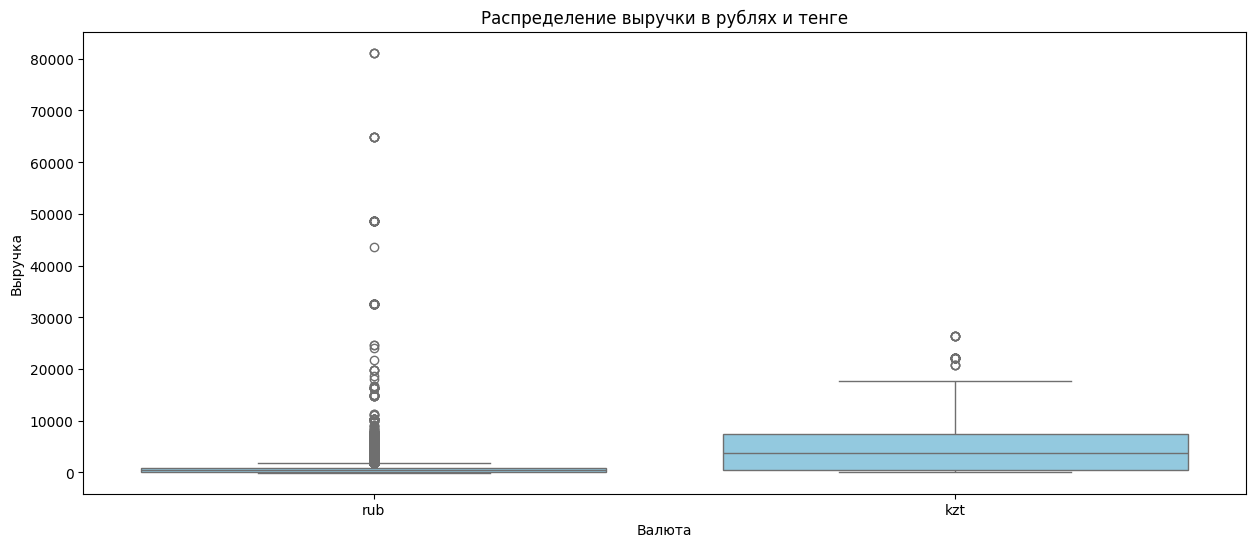

In [23]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим диаграмму размаха
sns.boxplot(data=union_df, x='currency_code', y='revenue', color='skyblue')
 
# Настраиваем подписи
plt.title('Распределение выручки в рублях и тенге')
plt.xlabel('Валюта')
plt.ylabel('Выручка')

#Выводим график
plt.show()

Диаграмма размаха подтверждает наличие выбросов, которые искажают средние значения. Отфильтруем значения выручки по 99-му процентилю. Это позволит отсечь экстремальные значения и сфокусироваться на «нормальных» заказах, чтобы провести более корректный анализ.

In [24]:
# Фильтруем значения в рублях
rub_df = union_df[union_df['currency_code'] == 'rub']
rub_df = rub_df[rub_df['revenue'] <= rub_df['revenue'].quantile(0.99)]

# Фильтруем значения в тенге
kzt_df = union_df[union_df['currency_code'] == 'kzt']
kzt_df = kzt_df[kzt_df['revenue'] <= kzt_df['revenue'].quantile(0.99)]

# Объединяем обратно
union_df_filtered = pd.concat([rub_df, kzt_df], ignore_index=True)

In [25]:
# Сохраняем количество строк
filtered_row_count = union_df_filtered.shape[0]
print(f'Количество строк отфильтрованного датафрейма {filtered_row_count}, что составляет {round(filtered_row_count * 100.0 / initial_row_count, 2)}% от первоначального количества строк')

Количество строк отфильтрованного датафрейма 287962, что составляет 99.01% от первоначального количества строк


---

### Дубликаты в данных

Перед проверкой на дубликаты нормализуем данные в текстовых столбцах.

In [26]:
# Нормализуем данные
for col in union_df_filtered.columns:
    if union_df_filtered[col].dtype == 'object':
        union_df_filtered[col] = union_df_filtered[col].str.lower().str.strip()

Проверим, есть ли в данных полные дубликаты.

In [27]:
# Проверяем полные дубликаты
union_df_filtered.duplicated().sum()

np.int64(0)

Полных дубликатов нет. Проверим, есть ли строки с одинаковой комбинацией столбцов — это могут быть неявные дубликаты.

In [28]:
# Проверяем наличие неявных дубликатов по сочетанию столбцов
dup_cols = union_df_filtered.columns[1:]
union_df_filtered.duplicated(subset=dup_cols).sum()

np.int64(30)

В итоге мы обнаружили 30 неявных дубликата по всем признакам, кроме `order_id`. Удалим их с помощью метода `drop_duplicates()`.

In [29]:
#Удаляем неявные дубликаты
union_df_filtered = union_df_filtered.drop_duplicates(subset=dup_cols)

#Проверяем результат
union_df_filtered.duplicated(subset=dup_cols).sum()

np.int64(0)

In [30]:
# Сохраняем количество строк
final_row_count = union_df_filtered.shape[0]
print(f'Количество строк датафрейма без дубликатов {final_row_count}, что составляет {round(final_row_count * 100.0 / initial_row_count, 2)}% от первоначального количества строк')

Количество строк датафрейма без дубликатов 287932, что составляет 99.0% от первоначального количества строк


---

### Создание новых столбцов

Для дальнейшей работы создадим несколько новых столбцов:

- `revenue_rub` — выручка с заказа в единой валюте — рублях;
- `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие;
- `month` — месяц оформления заказа;
- `season` — сезон оформления заказа: лето, осень, зима, весна.

In [31]:
# Функция для приведения выручки к единой валюте (рубли)
def to_rub(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] * row['curs'] / row ['nominal']
    else: 
        return row['revenue']

# Создаём столбец revenue_rub
union_df_filtered['revenue_rub'] = union_df_filtered.apply(to_rub, axis=1)

# Проверяем результат
union_df_filtered[['currency_code', 'revenue', 'curs', 'nominal', 'revenue_rub']].sample(n=5, random_state=40)

,currency_code,revenue,curs,nominal,revenue_rub
262815,rub,376.00,19.120199,100,376.00
31199,rub,706.85,19.865499,100,706.85
140978,rub,69.85,20.277300,100,69.85
99445,rub,280.42,18.506701,100,280.42
209687,rub,76.17,19.075800,100,76.17


In [32]:
# Создаём столбец one_ticket_revenue_rub
union_df_filtered['one_ticket_revenue_rub'] = union_df_filtered['revenue_rub'] / union_df_filtered['tickets_count']

# Проверяем результат
union_df_filtered[['revenue_rub', 'tickets_count', 'one_ticket_revenue_rub']].head()

,revenue_rub,tickets_count,one_ticket_revenue_rub
0,1521.94,4,380.4850
1,289.45,2,144.7250
2,1258.57,4,314.6425
3,8.49,2,4.2450
4,1390.41,3,463.4700


In [33]:
# Создаём столбец month
union_df_filtered['month'] = union_df_filtered['created_dt_msk'].dt.month

# Проверяем результат
union_df_filtered[['created_dt_msk', 'month']].head()

,created_dt_msk,month
0,2024-08-20,8
1,2024-07-23,7
2,2024-10-06,10
3,2024-07-13,7
4,2024-10-04,10


In [34]:
# Функция для выделения сезона
def what_season(row):
    if row['month'] in [12, 1, 2]:
        return 'зима'
    elif row['month'] in [3, 4, 5]:
        return 'весна'
    elif row['month'] in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

# Создаём столбец season
union_df_filtered['season'] = union_df_filtered.apply(what_season, axis=1)

# Проверяем результат
union_df_filtered[['created_dt_msk', 'month', 'season']].head()

,created_dt_msk,month,season
0,2024-08-20,8,лето
1,2024-07-23,7,лето
2,2024-10-06,10,осень
3,2024-07-13,7,лето
4,2024-10-04,10,осень


Мы предобработали данные и создали новыe столбцы. Данные готовы к исследовательскому анализу.

---

### Промежуточные выводы по предобработке

В результате предобработки данных были выполнены следующие действия:

**1. Типы данных**:

- Столбцы с датой `created_dt_msk` и `created_ts_msk` приведены к типу `datetime`.
- Числовые столбцы оптимизированы по разрядности.

**2. Пропуски**:

- `days_since_prev` содержит ~7,5% пропусков. Это связано с отсутствием предыдущих покупок.
- Обнаружено 0,08% пропусков в столбцах с информацией о событиях. Это связано с объединением таблиц методом `left` на предыдущем шаге.
- Пропуски оставлены без изменений.

**3. Категориальные данные**:

- Столбцы с небольшим количеством категорий (`cinema_circuit`, `age_limit`, `currency_code`, `device_type_canonical`, `event_type_main`) проверены на неявные пропуски и дубликаты.
- В столбцах с большим числом категорий (`service_name`, `region_name`, `city_name`, `venue_name`) изучены топ-5 наиболее частых значений.
- Значения в категориальных столбцах выглядят корректно.

**4. Числовые данные**:

- Средняя выручка выше медианной: 547 ₽ vs 346 ₽ (рубли), 4995 ₸ vs 3699 ₸ (тенге), что указывает на выбросы.
- Диаграммы размаха подтвердили наличие редких заказов с высокой выручкой.
- Отфильтрованы значения выручки по 99-му процентилю по обеим валютам.
- Количество билетов распределено более равномерно: чаще всего пользователи покупают 2–4 билета, медианна в обеих валютах 3 билета.

**5. Дубликаты**:

- Текстовые столбцы приведены к нижнему регистру и очищены от лишних пробелов.
- Полных дубликатов не найдено.
- Найдено и удалено 30 неявных дубликата по сочетанию всех столбцов, кроме `order_id`.

**6. Новые столбцы**:

- Для дальнейшей работы созданы новые столбцы:
    - `revenue_rub` — выручка с заказа в единой валюте — рублях;
    - `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие;
    - `month` — месяц оформления заказа;
    - `season` — сезон оформления заказа: лето, осень, зима, весна.

**Главное**: данные очищены и подготовлены к исследовательскому анализу. После предобработки осталось 287 932 строки (99% от исходного объёма).

---

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

Изучим изменение пользовательской активности в связи с сезонностью.

Для каждого месяца найдём количество заказов и визуализируем результаты. Проверим, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.

In [35]:
# Найдём количество заказов для каждого месяца
order_count_per_month = union_df_filtered.groupby('month')['order_id'].count().reset_index()
order_count_per_month.columns = ['month', 'order_count']
order_count_per_month

,month,order_count
0,6,34343
1,7,40410
2,8,44572
3,9,69333
4,10,99274


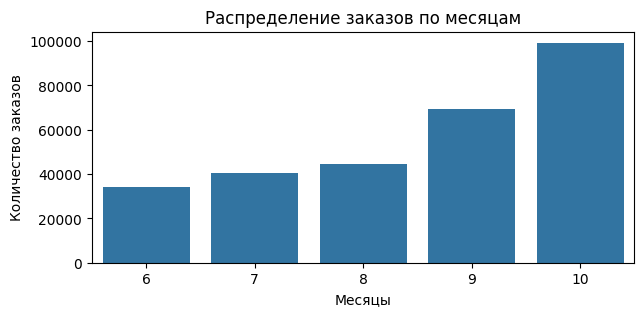

In [36]:
# Задаём размер графика
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
sns.barplot(data=order_count_per_month, 
            x='month', 
            y='order_count')

# Настраиваем подписи
plt.title('Распределение заказов по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Количество заказов')

# Выводим график
plt.show()

Количество заказов стабильно растёт от июня к октябрю: с 34 тыс. до почти 100 тыс. заказов. Наибольший рост наблюдается в начале осени — в сентябре и октябре.

Для осеннего и летнего периодов сравним распределение заказов по разным категориям: тип мероприятия, тип устройства, категория по возрастному рейтингу. Результаты визуализируем, чтобы сопоставить значения. При сопоставлении результатов для каждого сегмента используем доли.

In [37]:
# Группируем заказы по сезонам и типам мероприятия
order_count_season_event = union_df_filtered.groupby(['season', 'event_type_main'])['order_id'].count().reset_index()
order_count_season_event.columns = ['season', 'event_type', 'order_count']

# Находим общее число заказов для лета и осени
order_count_total = order_count_season_event.groupby('season')['order_count'].sum().reset_index()
order_count_total.columns = ['season', 'order_count_per_season']

# Объединяем таблицы
order_count_season_event = pd.merge(order_count_season_event, order_count_total, on='season')

# Находим долю каждого события от общего количества событий в разрезе сезонов
order_count_season_event['share'] = order_count_season_event['order_count'] / order_count_season_event['order_count_per_season']

# Проверяем результат
order_count_season_event

,season,event_type,order_count,order_count_per_season,share
0,лето,выставки,2416,119109,0.020284
1,лето,другое,32369,119109,0.271759
2,лето,концерты,50757,119109,0.426139
3,лето,спорт,3006,119109,0.025237
4,лето,стендап,6346,119109,0.053279
5,лето,театр,23942,119109,0.201009
6,лето,ёлки,273,119109,0.002292
7,осень,выставки,2436,168585,0.014450
8,осень,другое,33225,168585,0.197082
9,осень,концерты,62694,168585,0.371884


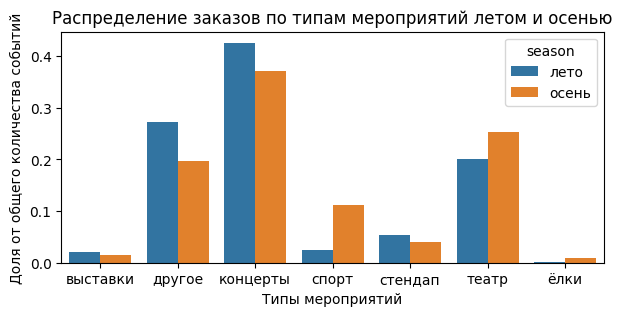

In [38]:
# Задаём размер графика
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
sns.barplot(data=order_count_season_event, 
            x='event_type', 
            y='share',
            hue = 'season'
           )

# Настраиваем подписи
plt.title('Распределение заказов по типам мероприятий летом и осенью')
plt.xlabel('Типы мероприятий')
plt.ylabel('Доля от общего количества событий')

# Выводим график
plt.show()

И летом, и осенью основную часть заказов продолжают составлять концерты и театр — они остаются ключевыми типами мероприятий для сервиса. При этом график показывает изменение предпочтений пользователей со сменой сезонов. Если летом выше доля концертов (43% против заказов 37% осенью), стендап (5% против 4% осенью) и выставки (2% против 1% осенью), то осенью выше доля заказов в театры (25% против 20% летом), на спорт (11% против 3% летом) и ёлки (1% против 0,2% летом). Это закономерно: осенью начинается театральный и спортивный сезоны, а билеты на ёлки покупают заранее перед зимними праздниками.

In [39]:
# Группируем заказы по сезонам и типам устройства
order_count_season_device = union_df_filtered.groupby(['season', 'device_type_canonical'])['order_id'].count().reset_index()
order_count_season_device.columns = ['season', 'device_type', 'order_count']

# Объединяем таблицы
order_count_season_device = pd.merge(order_count_season_device, order_count_total, on='season')

# Находим долю каждого события от общего количества событий в разрезе сезонов
order_count_season_device['share'] = order_count_season_device['order_count'] / order_count_season_device['order_count_per_season']

# Проверяем результат
order_count_season_device

,season,device_type,order_count,order_count_per_season,share
0,лето,desktop,23103,119109,0.193965
1,лето,mobile,96222,119109,0.807848
2,осень,desktop,34303,168585,0.203476
3,осень,mobile,134304,168585,0.796655


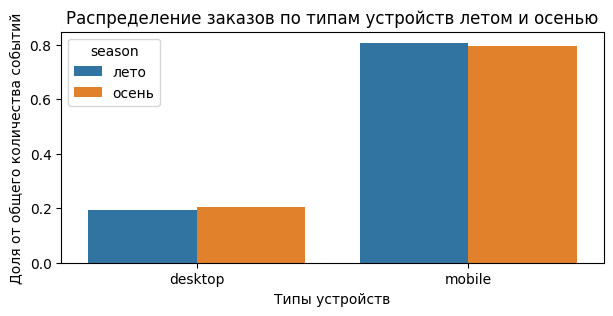

In [40]:
# Задаём размер графика
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
sns.barplot(data=order_count_season_device, 
            x='device_type', 
            y='share',
            hue = 'season'
           )

# Настраиваем подписи
plt.title('Распределение заказов по типам устройств летом и осенью')
plt.xlabel('Типы устройств')
plt.ylabel('Доля от общего количества событий')

# Выводим график
plt.show()

Соотношение заказов по типам устройств остаётся стабильным при смене сезонов — чаще всего пользователи делают заказы с мобильных (81% летом и 80% осенью).

In [41]:
# Группируем заказы по сезонам и возрастному рейтингу
order_count_season_age = union_df_filtered.groupby(['season', 'age_limit'])['order_id'].count().reset_index()
order_count_season_age.columns = ['season', 'age_limit', 'order_count']

# Объединяем таблицы
order_count_season_age = pd.merge(order_count_season_age, order_count_total, on='season')

# Находим долю каждого события от общего количества событий в разрезе сезонов
order_count_season_age['share'] = order_count_season_age['order_count'] / order_count_season_age['order_count_per_season']

# Проверяем результат
order_count_season_age

,season,age_limit,order_count,order_count_per_season,share
0,лето,0,21404,119109,0.179701
1,лето,6,21679,119109,0.182010
2,лето,12,24520,119109,0.205862
3,лето,16,33778,119109,0.283589
4,лето,18,17944,119109,0.150652
5,осень,0,39828,168585,0.236249
6,осень,6,29725,168585,0.176321
7,осень,12,37233,168585,0.220856
8,осень,16,44218,168585,0.262289
9,осень,18,17603,168585,0.104416


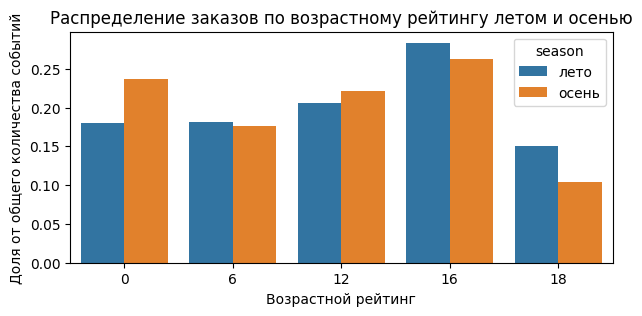

In [42]:
# Задаём размер графика
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
sns.barplot(data=order_count_season_age, 
            x='age_limit', 
            y='share',
            hue = 'season'
           )

# Настраиваем подписи
plt.title('Распределение заказов по возрастному рейтингу летом и осенью')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Доля от общего количества событий')

# Выводим график
plt.show()

График показывает, что летом пользователи чаще покупают билеты на взрослые мероприятия 16+ (28% против 26% осенью) и 18+ (15% против 10% осенью). Спрос на мероприятия 6+ остаётся стабильным (примерно 18%). Осенью растёт доля мероприятий 0+ (24% против 18% летом) и 12+ (22% против 21% летом), что может отражать рост популярности семейных и детских мероприятий перед праздниками.

Теперь изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью.

In [43]:
# Находим среднюю выручку с билета для каждого типа мероприятия летом
summer_revenue = union_df_filtered[union_df_filtered['season'] == 'лето'].groupby('event_type_main')['one_ticket_revenue_rub'].mean().reset_index()
summer_revenue.columns = ['event_type', 'one_ticket_revenue_summer']

# Находим среднюю выручку с билета для каждого типа мероприятия осенью
fall_revenue = union_df_filtered[union_df_filtered['season'] == 'осень'].groupby('event_type_main')['one_ticket_revenue_rub'].mean().reset_index()
fall_revenue.columns = ['event_type', 'one_ticket_revenue_fall']

# Объединяем таблицы
summer_fall_revenue = pd.merge(summer_revenue, fall_revenue, on='event_type')

# Находим относительное изменение
summer_fall_revenue['change_fall_summer'] = (
    (summer_fall_revenue['one_ticket_revenue_fall'] - 
     summer_fall_revenue['one_ticket_revenue_summer']) * 100 / 
     summer_fall_revenue['one_ticket_revenue_summer']
)

# Проверяем результат
summer_fall_revenue

,event_type,one_ticket_revenue_summer,one_ticket_revenue_fall,change_fall_summer
0,выставки,86.416198,90.603610,4.845634
1,другое,77.433968,76.115334,-1.702914
2,концерты,304.717077,268.084074,-12.021972
3,спорт,50.761831,49.969733,-1.560421
4,стендап,218.518107,231.124973,5.769255
5,театр,214.126333,175.969508,-17.819772
6,ёлки,271.436176,229.585589,-15.418205


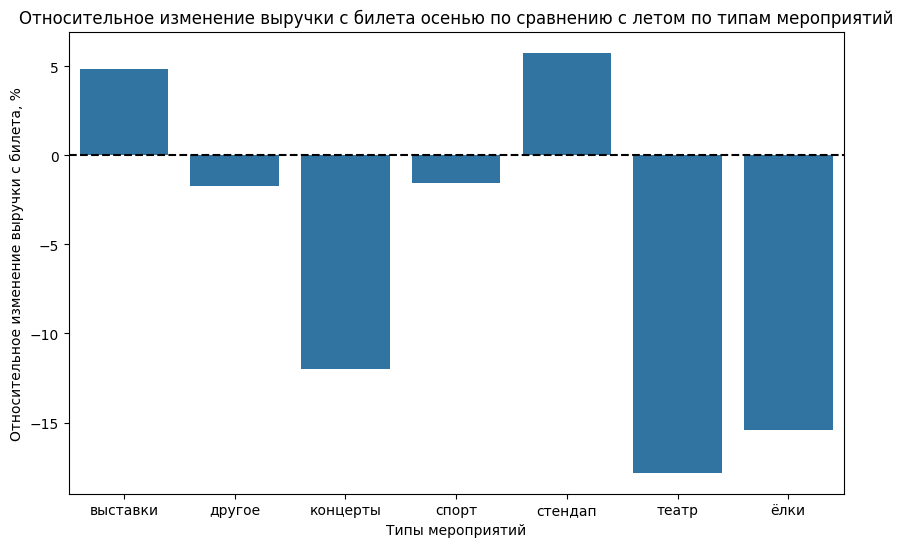

In [44]:
# Задаём размер графика
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
sns.barplot(data=summer_fall_revenue, 
            x='event_type', 
            y='change_fall_summer'
           )

# Добавляем горизонтальную линию
plt.axhline(0, color='black', linestyle='--')

# Настраиваем подписи
plt.title('Относительное изменение выручки с билета осенью по сравнению с летом по типам мероприятий')
plt.xlabel('Типы мероприятий')
plt.ylabel('Относительное изменение выручки с билета, %')

# Выводим график
plt.show()

Осенью средняя выручка сервиса с одного билета снизилась для большинства типов мероприятий. 

Наибольшее падение отмечается у театра (−18%), ёлок (−15%) и концертов (−12%). Падение по театру может быть связано с тем, что осенью появляется больше событий, в том числе более дешёвых, где комиссия сервиса ниже. В случае с концертами летние крупные фестивали завершились, а осенью остаются более камерные события с меньшей выручкой на билет. С ёлками снижение можно объяснить ранними продажами новогодних мероприятий с более низкой стоимостью билета.

У спортивных мероприятий выручка с билета снизилась незначительно (−2%), что связано с большим количеством осенних событий, включая дешёвые.

В то же время для выставок (+5%) и стендапа (+6%) осенью наблюдается рост средней выручки с билета, вероятно, за счёт более дорогих или популярных событий.

---

Таким образом, после анализа пользовательских предпочтений летом и осенью можно сделать следующие выводы:

**1. Рост числа заказов:** с июня по октябрь количество заказов стабильно увеличивается с 34 тыс. до почти 100 тыс., с наибольшим ростом в начале осени.

**2. Распределение заказов по типам мероприятий:** Концерты и театр остаются ключевыми категориями в структуре заказов оба сезона. Однако летом выше доля концертов (43% от всех заказов против 37% осенью), стендапа (5% против 4% осенью) и выставок (2% против 1% осенью). Осенью выше доля заказов на театральные постановки (25% против 20% летом), спорт (11% против 3% летом) и ёлки (1% против 0,2% летом). Это отражает сезонность: лето — период концертов и фестивалей на открытом воздухе, осень — театральный и спортивный сезоны, а билеты на ёлки скорее всего покупают заранее перед наступлением новогодних 
праздников.

**3. Распределение заказов по типам устройств:** распределение заказов по устройствам остаётся стабильным: около 80% заказов через мобильные устройства.

**4. Распределение заказов по возрастным категориям:** летом пользователи чаще покупают билеты на взрослые мероприятия (16+ — 28% от всех заказов против 26% осенью, 18+ — 15% против 10% осенью). При этом осенью растёт доля детских и подростковых мероприятий: 0+ — 24% от всех заказов осенью против 18% летом, 12+ — 22% осенью против 21% летом, что может отражать смену предпочтений в строну семейных событий и подготовку к праздникам.

**5. Выручка сервиса с одного билета:** осенью снизилась для большинства типов мероприятий: театр (−18%), ёлки (−15%), концерты (−12%), спорт (−2%). Исключения — выставки (+5%) и стендап (+6%). Снижение может быть связано с большим количеством осенних театральных и спортивных событий (в том числе недорогих), завершением летних крупных фестивалей, ранними продажами билетов на новогодние мероприятия со скидками.

**Главное:** осень приносит рост общего числа заказов и смещение интереса пользователей к театру, спорту, ёлкам и семейным мероприятиям, при этом средняя выручка с билета снижается для большинства типов мероприятий, за исключением выставок и стендапа.

---

### Осенняя активность пользователей

Изучим активность пользователей осенью 2024 года. 

Для начала проанализируем динамику изменений по дням для:
- общего числа заказов;
- количества активных пользователей DAU;
- среднего числа заказов на одного пользователя;
- средней стоимости одного билета.

In [45]:
# Формируем сводную таблицу
pivot_table_day = pd.pivot_table(
    data=union_df_filtered[union_df_filtered['season'] == 'осень'],
    index='created_dt_msk',
    aggfunc={
        'order_id': 'count',
        'user_id': 'nunique',
        'revenue': 'sum',
        'tickets_count': 'sum'
    }
).reset_index()

# Переименовываем столбцы
pivot_table_day = pivot_table_day.rename(columns={
    'created_dt_msk': 'date',
    'order_id': 'order_count',
    'user_id': 'active_users',
    'revenue': 'revenue_per_day',
    'tickets_count': 'tickets_per_day'
    
})

# Считаем остальные показатели
pivot_table_day['orders_per_user'] = pivot_table_day['order_count'] / pivot_table_day['active_users']
pivot_table_day['revenue_per_ticket'] = pivot_table_day['revenue_per_day'] / pivot_table_day['tickets_per_day']

# Проверяем результат
pivot_table_day.head()

,date,order_count,revenue_per_day,tickets_per_day,active_users,orders_per_user,revenue_per_ticket
0,2024-09-01,1327,733571.82,3718,564,2.352837,197.302803
1,2024-09-02,1380,777955.47,3704,574,2.404181,210.031174
2,2024-09-03,5111,1229176.90,15290,778,6.569409,80.390903
3,2024-09-04,1773,950093.25,4802,685,2.588321,197.853655
4,2024-09-05,1944,1106281.15,5214,739,2.630582,212.175134


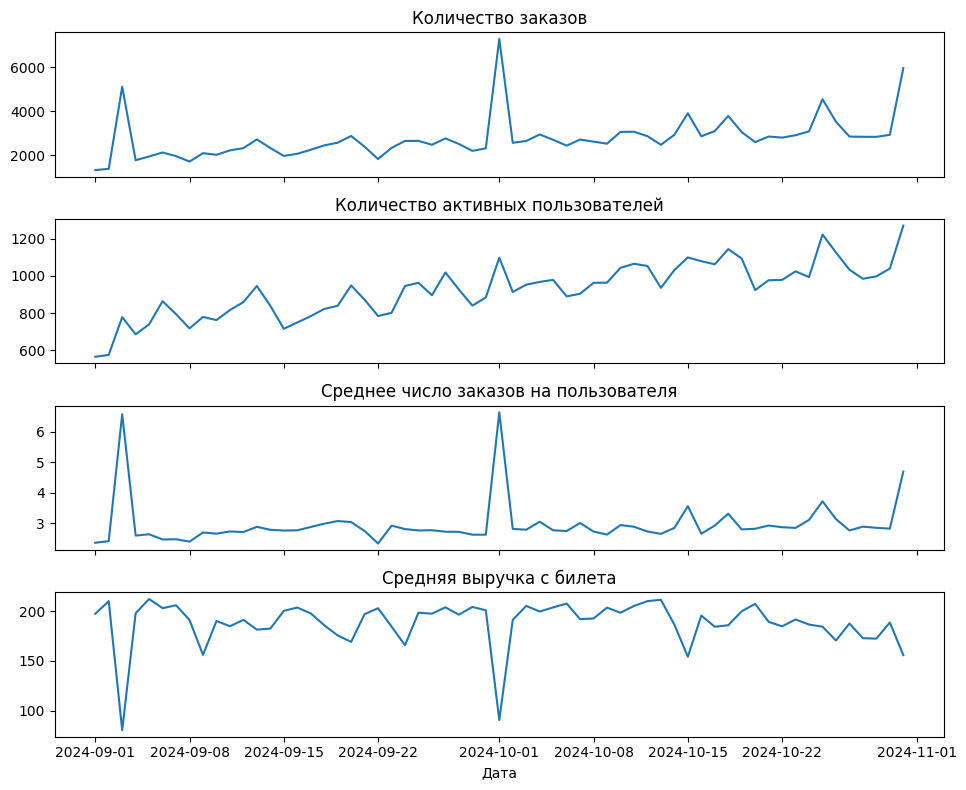

In [46]:
# Создаём фигуру и оси — 4 строки, 1 столбец, общая ось X
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# График 1 — количество заказов
sns.lineplot(data=pivot_table_day, x='date', y='order_count', ax=axes[0])
axes[0].set_title('Количество заказов')

# График 2 — активные пользователи
sns.lineplot(data=pivot_table_day, x='date', y='active_users', ax=axes[1])
axes[1].set_title('Количество активных пользователей')

# График 3 — среднее число заказов на пользователя
sns.lineplot(data=pivot_table_day, x='date', y='orders_per_user', ax=axes[2])
axes[2].set_title('Среднее число заказов на пользователя')

# График 4 — средняя выручка с билета
sns.lineplot(data=pivot_table_day, x='date', y='revenue_per_ticket', ax=axes[3])
axes[3].set_title('Средняя выручка с билета')

# Настраиваем внешний вид
plt.tight_layout()

# Настраиваем подписи
plt.xlabel('Дата')
for ax in axes:
    ax.set_ylabel('')

# Выводим на экран
plt.show()

По графикам можно сделать следующие выводы:

1. Количество заказов с начала сентября по конец октября постепенно растёт. 
2. Количество активных пользователей также увеличивается во времени, тренд повторяет рост заказов.
3. Среднее число заказов на пользователя в среднем держится в районе 2–3 заказов, но иногда наблюдаются резкие всплески.
4. Средняя выручка с билета в среднем держится в районе 190 рублей, но иногда наблюдаются резкие падения.
5. В начале сентября и октября наблюдается всплеск количества заказов (общего и на пользователя), который совпадает со снижением средней выручки с билета. Вероятно, в эти дни проходили акции, и люди больше покупали по сниженной цене. В результате выручка с билета падает при росте количества заказов.

Теперь изучим активность пользователей в зависимости от дня недели.

In [47]:
# Добавляем в сводную таблицу столбец с днём недели, 1 — понедельник, 7 — воскресенье
pivot_table_day['weekday'] = pivot_table_day['date'].dt.weekday + 1

# Формируем сводную таблицу
pivot_table_dow = pivot_table_day.groupby('weekday').agg(
        order_count_dow=('order_count', 'sum'),
        active_users_dow=('active_users', 'sum'),
        revenue_per_dow=('revenue_per_day', 'sum'),
        tickets_per_dow=('tickets_per_day', 'sum'),
        avg_order_count=('order_count', 'mean'),
        avg_active_users=('active_users', 'mean')
).reset_index()

# Считаем остальные показатели
pivot_table_dow['avg_orders_per_user'] = pivot_table_dow['order_count_dow'] / pivot_table_dow['active_users_dow']
pivot_table_dow['avg_revenue_per_ticket'] = pivot_table_dow['revenue_per_dow'] / pivot_table_dow['tickets_per_dow']

# Проверяем результат
pivot_table_dow

,weekday,order_count_dow,active_users_dow,revenue_per_dow,tickets_per_dow,avg_order_count,avg_active_users,avg_orders_per_user,avg_revenue_per_ticket
0,1,21517,7685,10962009.47,58592,2390.777778,853.888889,2.799870,187.090549
1,2,31480,8408,12495538.02,89614,3497.777778,934.222222,3.744053,139.437343
2,3,22888,8309,11899692.59,61659,2543.111111,923.222222,2.754603,192.991982
3,4,27169,8659,13432718.88,72538,3018.777778,962.111111,3.137660,185.181820
4,5,24828,8181,13009098.20,68240,3103.500000,1022.625000,3.034837,190.637430
5,6,21336,7686,11546206.35,59272,2667.000000,960.750000,2.775956,194.800350
6,7,19389,7404,10703118.05,53140,2154.333333,822.666667,2.618720,201.413588


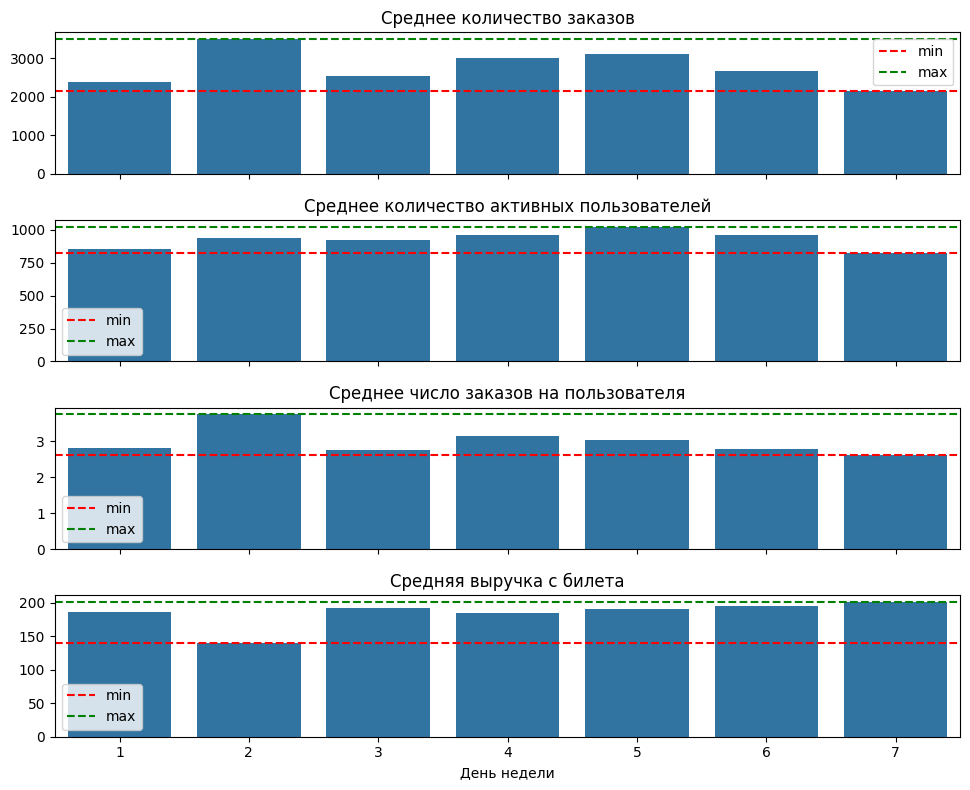

In [48]:
# Создаём фигуру и оси
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Сохраняем метрики
metrics = [
    ('avg_order_count', 'Среднее количество заказов'),
    ('avg_active_users', 'Среднее количество активных пользователей'),
    ('avg_orders_per_user', 'Среднее число заказов на пользователя'),
    ('avg_revenue_per_ticket', 'Средняя выручка с билета')
]

# Строим графики
for i, (metric, title) in enumerate(metrics):
    sns.barplot(data=pivot_table_dow, x='weekday', y=metric, ax=axes[i])
    axes[i].set_title(title)
    
    # Добавляем линии min и max
    min_val = pivot_table_dow[metric].min()
    max_val = pivot_table_dow[metric].max()
    axes[i].axhline(min_val, color='red', linestyle='--', label='min')
    axes[i].axhline(max_val, color='green', linestyle='--', label='max')

    # Показываем легенду с min/max
    axes[i].legend()  

# Настраиваем внешний вид
plt.tight_layout()

# Настраиваем подписи
plt.xlabel('День недели')
for ax in axes:
    ax.set_ylabel('')

# Выводим на экран
plt.show()

Судя по графикам, можно сделать следующие наблюдения о динамике активности пользователей по дням недели:

**1. Среднее количество заказов**
- Наибольшее количество заказов приходится на вторник (ок. 3,5 тыс), четверг и пятницу (ок. 3 тыс).
- Наименьшее — в воскресенье и понедельник (ок. 2 тыс).

**2️. Среднее количество активных пользователей**
- Наибольшее количество активных пользователей приходится на пятницу(более 1 тыс).
- Наименьшее — в воскресенье (ок. 800) и понедельник (ок. 850).

**3️. Среднее число заказов на пользователя**
- Среднее количество заказов на одного пользователя выше всего во вторник (ок. 4).
- В остальные дни показатель относительно стабилен (2-3 заказа).

**4️. Средняя выручка с билета**
- Наибольшая средняя выручка с билета — в выходные (195-200 руб) и среду (193 руб).
- Наименьшая — во вторник (139 руб).

---

Таким образом, после анализа осенней активности пользователей можно сделать следующие выводы:

**1. Динамика по дням:** 
- С начала осени и до конца октября наблюдается рост числа заказов (с 1,3 тыс. до почти 6 тыс.) и активных пользователей (от 600 до 1,3 тыс.). 
- Среднее число заказов на пользователя в среднем держится в районе 2–3 заказов, но иногда наблюдаются резкие всплески.
- Средняя выручка с билета в среднем держится в районе 190 рублей, но иногда наблюдаются резкие падения.
- Всплески среднего числа заказов на пользователя и падение средней выручки с билетов совпадают и, вероятно, связаны с акциями.

**2. Недельная динамика:**
   - Пик количества заказов приходится на вторник (ок. 3,5 тыс), а пик количества активных пользователей — на пятницу (ок. 1 тыс).
   - При этом в будни средняя выручка с билета ниже, а к выходным этот показатель растёт и достигает 195-200 руб.
   - Среднее число заказов на пользователя держится в районе 2-3 заказов, с небольшим ростом во вторник (до 4 заказов).
   - Таким образом, во вторник и перед выходными наблюдается пик пользовательской активности — пользователи совершают больше покупок по выгодным ценам. В выходные и понедельник активность снижается, но растёт средняя выручка с билета, что может говорить о более дорогих и взвешенных покупках.

---

### Топовые регионы и партнёры

Посмотрим на распределение событий по регионам и партнёрам осенью. Это позволит выделить ключевые категории, которые вносят наибольший вклад в выручку.

In [49]:
# Для каждого региона считаем уникальное количество мероприятий и общее число заказов
region_distribution = union_df_filtered[union_df_filtered['season'] == 'осень'].groupby('region_name').agg(
    event_count=('event_id', 'nunique'),
    order_count=('order_id', 'count')
).sort_values(by='event_count', ascending=False).reset_index()

# Добавляем дополнительные столбы
region_distribution['events_share'] = round(region_distribution['event_count'] / region_distribution['event_count'].sum(), 2)
region_distribution['cum_events_share'] = region_distribution['events_share'].cumsum()
region_distribution['orders_share'] = round(region_distribution['order_count'] / region_distribution['order_count'].sum(), 2)
region_distribution['cum_orders_share'] = region_distribution['orders_share'].cumsum()

# Выводим топ-10 регионов по количеству событий
region_distribution.head(10)

,region_name,event_count,order_count,events_share,cum_events_share,orders_share,cum_orders_share
0,каменевский регион,3910,46684,0.25,0.25,0.28,0.28
1,североярская область,2613,20718,0.16,0.41,0.12,0.40
2,широковская область,803,8715,0.05,0.46,0.05,0.45
3,светополянский округ,764,4779,0.05,0.51,0.03,0.48
4,речиновская область,529,3565,0.03,0.54,0.02,0.50
5,серебринская область,456,4467,0.03,0.57,0.03,0.53
6,яблоневская область,432,4199,0.03,0.60,0.02,0.55
7,тепляковская область,419,2485,0.03,0.63,0.01,0.56
8,горицветская область,406,3230,0.03,0.66,0.02,0.58
9,солнечноземская область,403,4228,0.03,0.69,0.03,0.61


In [50]:
# Посчитаем процент регионов, в которых проходит не более 1% мероприятий
outsider_regions = round(region_distribution[region_distribution['events_share'] <= 0.01].shape[0] * 100 / region_distribution.shape[0])
print(f'В {outsider_regions}% регионов проходит не более 1% от всех мероприятий')

В 81% регионов проходит не более 1% от всех мероприятий


Четыре крупнейших региона обеспечивают около 50% всех мероприятий и заказов:

- Каменевский регион — 25% событий и 28% заказов;
- Североярская область — 16% событий и 12% заказов;
- Широковская область — 5% событий и 5% заказов;
- Светополянский округ — 5% событий и 3% заказов.

Активность пользователей и организаторов заметно сконцентрирована: значительная часть событий и покупок приходится на ограниченное число регионов. Остальные территории вносят относительно небольшой вклад — в 81% регионов проводится не более 1 % всех мероприятий. Это говорит о выраженной неравномерности распределения предложения и спроса: ключевые регионы формируют основной пул событий и заказов, тогда как другие остаются на периферии.

In [51]:
# Для каждого билетного партнёра считаем уникальное количество мероприятий и общее число заказов
service_distribution = union_df_filtered[union_df_filtered['season'] == 'осень'].groupby('service_name').agg(
    event_count=('event_id', 'nunique'),
    order_count=('order_id', 'count'),
    revenue_total=('revenue', 'sum')
).sort_values(by='revenue_total', ascending=False).reset_index()

# Добавляем дополнительные столбы
service_distribution['events_share'] = round(service_distribution['event_count'] / service_distribution['event_count'].sum(), 2)
service_distribution['orders_share'] = round(service_distribution['order_count'] / service_distribution['order_count'].sum(), 2)
service_distribution['revenue_share'] = round(service_distribution['revenue_total'] / service_distribution['revenue_total'].sum(), 2)
service_distribution['cum_revenue_share'] = service_distribution['revenue_share'].cumsum()


# Выводим топ-10 билетных партнёров по выручке
service_distribution.head(10)

,service_name,event_count,order_count,revenue_total,events_share,orders_share,revenue_share,cum_revenue_share
0,билеты без проблем,2847,32383,13538511.75,0.16,0.19,0.16,0.16
1,мой билет,1006,19419,11636878.48,0.06,0.12,0.14,0.30
2,облачко,1409,15478,10611051.69,0.08,0.09,0.13,0.43
3,лови билет!,3616,25792,10376793.48,0.21,0.15,0.12,0.55
4,весь в билетах,599,9406,9325570.66,0.03,0.06,0.11,0.66
5,билеты в руки,2471,25734,7613965.50,0.14,0.15,0.09,0.75
6,край билетов,193,2997,3018372.54,0.01,0.02,0.04,0.79
7,яблоко,537,3473,2763332.31,0.03,0.02,0.03,0.82
8,прачечная,728,5798,2548310.47,0.04,0.03,0.03,0.85
9,тебе билет!,859,3749,2137900.34,0.05,0.02,0.03,0.88


In [52]:
# Посчитаем процент билетных партнёров, которые приносят не более 1% выручки
outsider_services = round(service_distribution[service_distribution['revenue_share'] <= 0.01].shape[0] * 100 / service_distribution.shape[0])
print(f'{outsider_services}% билетных операторов приносят не более 1% выручки')

66% билетных операторов приносят не более 1% выручки


Десять крупнейших сервисов обеспечивают около 90% всей выручки, при этом лидирующие позиции занимают несколько компаний:

- «Билеты без проблем» — абсолютный лидер по выручке (16% от общей суммы) при 16% событий и 19% заказов.
- «Мой билет» — на втором месте с 14% выручки и относительно скромной долей событий (6%) и заказов (12%).
- «Облачко» занимает 3 место, формируя 13% общей выручки при 8% событий и 9% заказовот общего числа.

Уже после первых шести билетных партнёров доля накопленной выручки достигает 75% от общей суммы, а 66% билетных операторов приносят не более 1% выручки. Рынок билетных сервисов выглядит высококонцентрированным: несколько крупных игроков контролируют большую часть оборота.

---

Таким образом, осенью активность на рынке мероприятий и билетов остаётся сильно сконцентрированной — как по регионам, так и по билетным операторам.

**По регионам**

Примерно половина всех событий и заказов пришлась на четыре региона:

- Каменевский регион — 25% событий и 28% заказов;
- Североярская область — 16% событий и 12% заказов;
- Широковская область — 5% событий и 5% заказов;
- Светополянский округ — 5% событий и 3% заказов.

Это означает, что половина активности сосредоточена всего в нескольких регионах, тогда как большинство регионов остаются слабо вовлечёнными: в 81% из них проходит не более 1% всех мероприятий. Ключевые регионы формируют основной поток событий и заказов, а периферийные вносят минимальный вклад.

**По билетным операторам**

Рынок продаж билетов демонстрирует схожую картину. Десять крупнейших партнёров обеспечивают около 90% выручки, а 66% операторов приносят не более 1%.
Лидеры осеннего сезона:

- «Билеты без проблем» — 16% выручки, 16% событий и 19% заказов;
- «Мой билет» — 14% выручки при 6% событий и 12% заказов;
- «Облачко» — 13% выручки, 8% событий и 9% заказов.

Уже первые шесть операторов формируют три четверти выручки. Значительная часть оборота сосредоточена у нескольких крупных игроков.

---

### Промежуточные выводы по исследовательскому анализу

Исследовательский анализ данных позволил выявить следующие закономерности:

**1. Динамика спроса и пользовательские предпочтения**

С июня по октябрь количество заказов выросло почти в три раза — с 34 до 100 тыс. При этом структура заказов сместилась: 

- и летом, и осенью основную долю в струкруре заказов продолжают занимать концерты и театр — они остаются ключевыми типами мероприятий для сервиса;
- летом выше доля концертов (43% от всех заказов против 37% осенью) и стендапа (5% заказов против 4% осенью);
- осенью выше доля заказов в театр (25% заказов против 20% летом), на спорт (11% заказов против 3% летом) и ёлки (1% заказов против 0,2% летом).

Осенью наблюдается смещение в сторону семейных событий: категории 0+ и 12+ осенью суммарно занимают 46% заказов против 39% летом.

Несмотря на рост общего числа заказов, средняя выручка с билета осенью снизилась для большинства категорий (театр −18%, концерты −12%, ёлки -15%, спорт −2%), что может быть связано с большим предложением недорогих событий, переходом к более камерным концертам после сезона летних фестивалей и ранними скидками на новогодние мероприятия. В то же время для выставок и стендапа осенью наблюдается рост средней выручки с билета (+5% и +6% соответственно).

**2. Активность пользователей осенью**

С начала сентября до конца октября наблюдается устойчивый рост числа заказов (с 1,3 тыс. до почти 6 тыс.) и количества активных пользователей (от 600 до 1,3 тыс.). Среднее число заказов на пользователя в среднем держатся на уровне 2–3, средняя выручка с билета — на уровне ок. 190 ₽. Резкие всплески заказов на пользователя и падения выручки с билета обычно совпадают и, вероятно, связаны с акциями.

По дням недели прослеживается чёткий ритм:

- пик активности приходится на вторник, четверг и пятницу (3–3,5 тыс. заказов в день),
- в выходные и понедельник активность снижается, но средняя выручка с билета возрастает до ~200 руб.

Таким образом, будни — время массовых покупок по доступным ценам, а выходные — период более дорогих и обдуманных заказов.

**3. Регионы и партнёры**

Активность осенью остаётся сильно сконцентрированной географически. Примерно половина всех событий и заказов пришлась на четыре региона: 
- Каменевский (25% событий, 28% заказов),
- Североярскую область (16% событий и 12% заказов),
- Широковскую область (5% событий и 5% заказов),
- Светополянский округ (5% событий и 3% заказов).

При этом в 81% регионов проходит не более 1% всех мероприятий, что указывает на сильную неравномерность распределения.

Похожая картина наблюдается и среди билетных операторов. 10 крупнейших партнёров обеспечивают около 90% выручки. Лидеры сезона:
- «Билеты без проблем» (16% выручки),
- «Мой билет» (14% выручки),
- «Облачко» (13% выручки).

При этом 66% операторов приносят менее 1% оборота, что говорит о высокой концентрации рынка.

**Главное:**

1. Осень — пик пользовательской активности и смена культурного фокуса: в структуре заказов растет доля театра, спорта и семейных мероприятий.
2. Несмотря на рост количества заказов, осенью средняя выручка с билета снизилась для большинства типов мероприятий.
3. Активность пользователей циклична: больше покупок в будни (особенно вторник и перед выходными), дороже — в выходные.
5. Рынок остаётся высококонцентрированным: несколько регионов и билетных операторов формируют основную долю событий, заказов и выручки. 

---

## Статистический анализ данных

Проверим две гипотезы, которые предполагают большую активность пользователей мобильных устройств в осенний период:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

### Сравнение групп

Сравним размеры групп, их статистики и распределение.

In [53]:
# Сравниваем размеры групп
union_df_filtered[union_df_filtered['season'] == 'осень'].groupby('device_type_canonical')['user_id'].nunique()

device_type_canonical
desktop     4869
mobile     14190
Name: user_id, dtype: int64

Размеры групп разные: пользователей, делающих заказы с мобильных устройств более чем в 3 раза больше, чем пользователей ПК. Неравный размер групп сам по себе не запрещает сравнение средних, и многие статистические тесты устойчивы к разной выборке. Но будем иметь в виду, что из-за бОльшего количества записей мы можем получить более стабильную оценку среднего среди пользователей мобильных, а среди ПК оценка может быть менее надёжной, а дисперсия — выше.

Для дальнейшего анализа агрегируем данные по пользователям и устройствам. Для каждого пользователя рассчитаем количество заказов и среднее время между ними. Усреднение по пользователю позволит избежать ситуации, когда активные пользователи с большим числом заказов оказывают непропорционально сильное влияние на результат. 

In [54]:
# Агрегируем данные по пользователям и устройствам
device_user_agg_df = (
    union_df_filtered[union_df_filtered['season'] == 'осень']
    .groupby(['device_type_canonical', 'user_id'])
    .agg(
        order_count=('order_id', 'count'),
        avg_days_since_prev=('days_since_prev', 'mean')
    )
    .reset_index()
)


# Проверяем результат
device_user_agg_df.head()

,device_type_canonical,user_id,order_count,avg_days_since_prev
0,desktop,0028d17a676f8c8,1,NaN
1,desktop,002b75ca606ba46,3,4.666667
2,desktop,002ec276eee9b0b,1,10.000000
3,desktop,0040e12d70fae81,1,39.000000
4,desktop,005fefeabf1e678,3,0.000000


В третьей строке мы видим количество дней с предыдущего заказа 10, не смотря на то, что заказ всего один. Такое может быть, если пользователь совершал предыдущие заказы с другого типа устройства. Таким образом, с ПК данный пользователь купил всего раз, а предыдущие покупки делал с мобильного устройства. Посчитаем процент таких пользователей — которые покупали с разных девайсов.

In [55]:
(device_user_agg_df['user_id'].value_counts() > 1).mean() * 100

np.float64(20.55791005123664)

Около 21% пользователей совершали покупки с разных устройств. Поскольку промежутки между заказами учитываются независимо от устройства, это может слегка размывать различия между группами. Тем не менее, для анализа мы будем рассматривать группы как есть, чтобы показать общее поведение пользователей.

In [56]:
# Сравниваем статистики групп по количеству заказов на пользователя
device_user_agg_df.groupby('device_type_canonical')['order_count'].describe()

,count,mean,std,min,25%,50%,75%,max
device_type_canonical,,,,,,,,
desktop,4869.0,7.045184,35.987490,1.0,1.0,2.0,4.0,1502.0
mobile,14190.0,9.464693,68.055516,1.0,1.0,2.0,5.0,4336.0


В обоих случаях средние значения (7 заказов на пользователя в случае со стационарными устройствами и 9 в случае с мобильными) значительно превышают медианные (2 заказа в обоих случаях), а максимальные значения составляют тысячи заказов на одного пользователя. Это может укзывать на наличие выбросов. Разброс по количеству заказов значительно выше у мобильных (std = 68 против 36). Проверим распределения на графике.

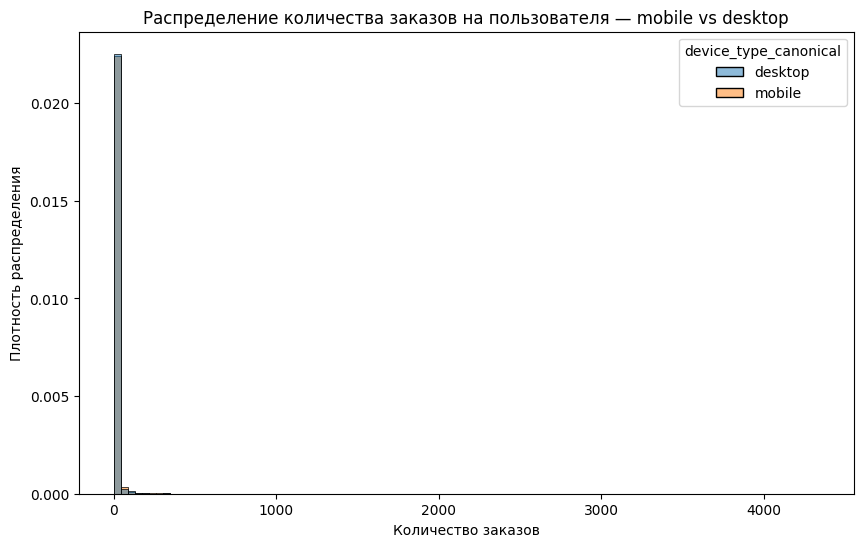

In [57]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим график распределения
sns.histplot(data=device_user_agg_df, 
             x='order_count', 
             hue='device_type_canonical', 
             bins=100,
             stat='density',
             common_norm=False
)

# Настраиваем подписи
plt.title('Распределение количества заказов на пользователя — mobile vs desktop')
plt.xlabel('Количество заказов')
plt.ylabel('Плотность распределения')

# Выводим график
plt.show()

Судя по графику и статистикам, распределение часов чтения сильно скошено вправо: большинство пользователей делают небольшое количество заказов, а есть редкие экстремальные значения (до 1502 зказов со стационарных и 4336 с мобильных устройств). Обычный t-тест предполагает нормальность распределения, поэтому в данном случае логичнее использовать тест Манна-Уитни, хоть он и не сравнивает средние напрямую. Он устойчив к выбросам и скошенности.

In [58]:
# Сравниваем статистики групп по времени между заказами
device_user_agg_df.groupby('device_type_canonical')['avg_days_since_prev'].describe()

,count,mean,std,min,25%,50%,75%,max
device_type_canonical,,,,,,,,
desktop,4034.0,14.860467,24.200068,0.0,1.000000,4.5,17.0,146.0
mobile,10193.0,20.632370,27.374302,0.0,2.052632,9.5,28.0,148.0


В обоих случаях средние значения (15 дней между заказами в случае стационарных устройств и 21 в случае мобильных) значительно превышают медианные (ок. 5 дней между заказами в случае стационарных устройств и ок. 10 в случае с мобильных), а максимальные значения составляют около 150 дней для обоих типов. Это может укзывать на наличие выбросов. Разброс по количеству дней различается не сильно (std = 24 и 27). Проверим распределения на графике.

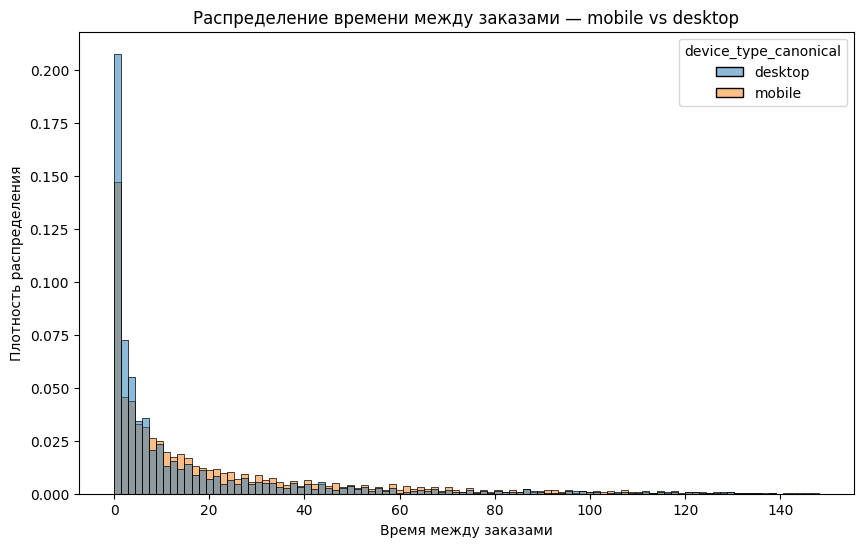

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим график распределения
sns.histplot(data=device_user_agg_df, 
             x='avg_days_since_prev', 
             hue='device_type_canonical', 
             bins=100,
             stat='density',
             common_norm=False
)

# Настраиваем подписи
plt.title('Распределение времени между заказами — mobile vs desktop')
plt.xlabel('Время между заказами')
plt.ylabel('Плотность распределения')

# Выводим график
plt.show()

Судя по графику и статистикам, распределение времени между заказами сильно скошено вправо: между заказами пользователей мобильных устройств проходит обычно 0-28 дней, в случае с ПК — 0-17 дней, при этом есть экстремальные значения до 146-148 дней. Обычный t-тест предполагает нормальность распределения, поэтому в данном случае логичнее использовать тест Манна-Уитни, хоть он и не сравнивает средние напрямую. Он устойчив к выбросам и скошенности.

---

### Проверка гипотез

Сформулируем нулевую и альтернативную гипотезы о количестве заказов на пользователя разных типов устройств:

- Нулевая гипотеза H₀: Среднее количество заказов на одного пользователя мобильного приложения не превышает среднее количество заказов на одного пользователя стационарного устройства.
- Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

In [60]:
# Проводим тест Манна-Уитни

alpha = 0.05

mw_test = st.mannwhitneyu(
    device_user_agg_df[device_user_agg_df['device_type_canonical'] == 'mobile']['order_count'], 
    device_user_agg_df[device_user_agg_df['device_type_canonical'] == 'desktop']['order_count'],
    alternative='greater'
)

if mw_test.pvalue < alpha:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')
    
else:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue=3.4035315919495096e-07 < 0.05
Отвергаем нулевую гипотезу


Таким образом, данные дают основание полагать, что среднее количество заказов на пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и эта разница статистически значима.

---

Сформулируем нулевую и альтернативную гипотезы о среднем времени между заказами пользователей разных типов устройств:
- Нулевая гипотеза H₀: Среднее время между заказами пользователей мобильных приложений не превышает среднего времени между заказами пользователей стационарных устройств.
- Альтернативная гипотеза H₁: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [61]:
# Проводим тест Манна-Уитни

alpha = 0.05

mw_test = st.mannwhitneyu(
    device_user_agg_df.loc[device_user_agg_df['device_type_canonical'] == 'mobile', 'avg_days_since_prev'].dropna(), 
    device_user_agg_df.loc[device_user_agg_df['device_type_canonical'] == 'desktop', 'avg_days_since_prev'].dropna(),
    alternative='greater'
)

if mw_test.pvalue < alpha:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу')
    
else:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue=1.9756327794416175e-52 < 0.05
Отвергаем нулевую гипотезу


Таким образом, данные дают основание полагать, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и эта разница статистически значима.

---

### Промежуточные выводы по статистическому анализу данных

**Проверяемые гипотезы:** 
1. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями ПК.
2. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями ПК.
  
**Обоснование теста:**
- Распределения обеих метрик (количество заказов на человека и время между заказами) имеют сильный правосторонний перекос и выбросы. Большинство пользователей совершают мало заказов, а у небольшой доли их тысячи.
- Для проверки использован тест Манна-Уитни. Он подходит, когда присутствуют выбросы и распределение ассиметрично.
- Уровень значимости выбран α = 0.05, что является стандартным порогом для статистических исследований и означает, что мы готовы принять риск ошибки первого рода (отклонения верной нулевой гипотезы) в 5%.

**Результаты тестов:**
- Гипотеза 1. pvalue=3.4035315919495096e-07 < 0.05
- Гипотеза 2. pvalue=1.9756327794416175e-52 < 0.05

**Интерпретации тестов:**
1. Пользователи мобильного приложения совершают в среднем больше заказов, чем пользователи ПК. Разница статистически значима. Это подтверждает гипотезу о большей активности мобильных пользователей.
2. Среднее время между заказами у мобильных пользователей также выше, чем у пользователей ПК. Это означает, что при большем количестве заказов на человека пользователи мобильных возвращаются к покупке с бОльшими интервалами.

**Возможные причины полученных результатов:**
- Мобильные пользователи могут иметь более широкий охват и разнообразное поведение: часть активно покупает билеты, часть заходит эпизодически. Это создаёт высокий разброс и увеличивает средние интервалы между заказами.
- Пользователи ПК могут чаще совершать осознанные и «пакетные» покупки — например, планировать культурный досуг заранее и оформлять сразу несколько билетов, что сокращает интервалы между заказами.
- Около 23% пользователей используют оба типа устройств, что немного размывает различия между группами, но не влияет на общую картину: мобильные в среднем покупают реже, но их аудитория значительно шире.
- Разница в удобстве интерфейсов и сценариях использования (мобильное приложение для спонтанных покупок, ПК — для планирования) также может объяснять выявленные различия.

**Главное:** Пользователи мобильных устройств делают в среднем больше заказов, чем пользователи ПК, но интервалы между их заказами длиннее. Обе разницы статистически значимы при уровне α = 0.05.

---

## Итоговый вывод и рекомендации

### Общий обзор проделанной работы

В ходе проекта был проведён всесторонний анализ данных Яндекс Афиши за лето-осень 2024 года, включающий этапы:

**1. Объединение данных**

Загружены три источника: данные о заказах (`final_tickets_orders_df`), о событиях (`final_tickets_events_df`) и курс тенге к рублю (`final_tickets_tenge_df`). После объединения получен единый датафрейм `union_df` с 26 столбцами и ~290 тыс. строк.

**2. Предобработка**

- Столбцы с данными о времени приведены к корректному типу `datetime`. Оптимизирована разрядность числовых столбцов.
- Обнаруженные пропуски (7,5% в `days_since_prev` и 0,08% в информации о событиях) решено оставить как есть.
- Явные дубликаты не обнаружены, 30 неявных дубликата удалены.
- Созданы новые признаки: выручка в рублях, выручка с одного билета, месяц и сезон покупки.

**3. Очистка выбросов**

В данных по выручке обнаружены редкие заказы с очень высокими суммами. Значения выручки отфильтрованы по 99-му процентилю в каждой валюте (rub и kzt). Это позволило отсечь экстремальные значения и сфокусироваться на типичных заказах.

**4. Исследовательский анализ**

- Изучено распределение заказов по категориям (тип мероприятия, тип устройства, возрастной рейтинг) и сезонная динамика.
- Проанализирована осенняя активность пользователей: динамика общего числа заказов, количества активных пользователей, среднего числа заказов на пользователя и средней стоимости билета по дням. Изучена недельная цикличность.
- Определены топ-категории по числу мероприятий, заказов и выручке в разрезе регионов и билетных партнёров.

**5. Проверка гипотез**

Проверены две гипотезы с использованием теста Манна-Уитни:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями ПК.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями ПК.

В результате сформирована целостная картина изменений пользовательского спроса осенью 2024 года и различий в поведении аудиторий по типам устройств.

---

### Главные выводы

**Динамика и сезонные предпочтения**

- Количество заказов с июня по октябрь выросло почти втрое (с 34 до 100 тыс.).
- Концерты и театр остаются ключевыми категориями оба сезона. Однако летом выше доля концертов (43% против 37% осенью), стендапа и выставок, а осенью — театра (25% против 20% летом), спорта и ёлок. Это отражает сезонность: лето — сезон концертов, осень — театральных и спортивных мероприятий, а билеты на ёлки покупают заранее к праздникам.
- Средняя выручка с билета осенью снизилась почти для всех типов мероприятий (театр −18%, концерты −12%), кроме выставок и стендапа. Это может быть связано с ростом недорогих камерных событий и акциями перед Новым годом.

**Осенняя активность пользователей**

- С начала осени по конец октября наблюдается рост числа заказов (с 1,3 тыс. до почти 6 тыс.) и активных пользователей (от 600 до 1,3 тыс.). Среднее число заказов на пользователя (2-3) и средняя выручка с билета (ок. 190 ₽) остаются стабильными.
- Пик количества заказов приходится на вторник (ок. 3,5 тыс), а пик количества активных пользователей — на пятницу (ок. 1 тыс). 
- При этом в будни средняя выручка с билета ниже, а к выходным этот показатель растёт и достигает 195-200 руб.
- Вероятно, в будни пользователи совершают массовые и дешёвые покупки, а в выходные — осознанные и более дорогие.

**Регионы и билетные партнёры**

- Ок. 50% событий и заказов пришлось на четыре региона: Каменевский (25% событий, 28% заказов), Североярская область (16% событий, 12% заказов), Широковская область (5% событий, 5% заказов) и Светополянский округ — 5% событий, 3% заказов).
- 90% выручки обеспечивают 10 крупнейших операторов, лидируют «Билеты без проблем» (16% выручки, 16% событий и 19% заказов), «Мой билет» (14% выручки при 6% событий и 12% заказов) и «Облачко» (13% выручки, 8% событий и 9% заказов).
- Это указывает на высокую концентрацию рынка и зависимость от нескольких ключевых игроков.

**Разница в поведении пользователей разных устройств**

- Мобильные пользователи совершают значимо больше заказов на человека (в среднем 9 заказов против 7 на ПК).
- Время между заказами у мобильных пользователей также выше, чем у пользователей ПК (в среднем 21 день против 15 на ПК).
- Выявленные различия можно объяснить разницей в удобстве интерфейсов и сценариях использования (мобильное приложение для спонтанных нерегулярных покупок, ПК — для осознанного планирования культурного досуга).



---

### Рекомендации

**1. Стимулировать регулярные покупки мобильных пользователей:** Мобильные пользователи активнее, но делают покупки нерегулярно. Стоит стимулировать повторные покупки через персональные рекомендации и бонусы за регулярные покупки.

**2. Продвигать сезонные события:** Осенью наблюдается рост интереса к театру, спорту и семейным мероприятиям. Чтобы увеличить продажи, можно усилить продвижение этих категорий через подборки и сезонные кампании.

**3. Работать с региональной диверсификацией:** Сконцентрированность выручки в нескольких регионах создаёт риски. Важно расширять сеть партнёров и событий в менее активных областях, чтобы меньше зависеть от топ-регионов.

**4. Развивать партнёрскую сеть:** Основная выручка приходится на нескольких крупных операторов. Важно укреплять сотрудничество с ними, а также помогать мелким партнёрам в продвижении своих событий — через маркетинговую поддержку, рекомендации и совместные акции. Это позволит расширять пул мероприятий и снижать зависимость от ключевых игроков.

**5. Продолжить мониторинг сезонности:** Повторный анализ в зимне-весенний период поможет уточнить закономерности спроса и на его основе корректировать маркетинговую стратегию, планировать акции и адаптировать ассортимент билетов.